Passo 1: Leitura do Dataset

In [2]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Carregar o dataset
df = pd.read_csv('../data/heart.csv')

# Exibir as primeiras linhas do dataset para entender a estrutura
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


Passo 2: Análise Descritiva

Aqui, vamos explorar estatísticas descritivas de variáveis como idade, colesterol, pressão arterial em repouso e frequência cardíaca máxima.

In [3]:
# Estatísticas descritivas básicas
print(df[['age', 'chol', 'trestbps', 'thalach']].describe())

               age        chol     trestbps      thalach
count  1025.000000  1025.00000  1025.000000  1025.000000
mean     54.434146   246.00000   131.611707   149.114146
std       9.072290    51.59251    17.516718    23.005724
min      29.000000   126.00000    94.000000    71.000000
25%      48.000000   211.00000   120.000000   132.000000
50%      56.000000   240.00000   130.000000   152.000000
75%      61.000000   275.00000   140.000000   166.000000
max      77.000000   564.00000   200.000000   202.000000


Passo 3: Visualização dos Dados

Vamos criar gráficos para visualizar a distribuição de algumas variáveis e explorar possíveis correlações entre elas.

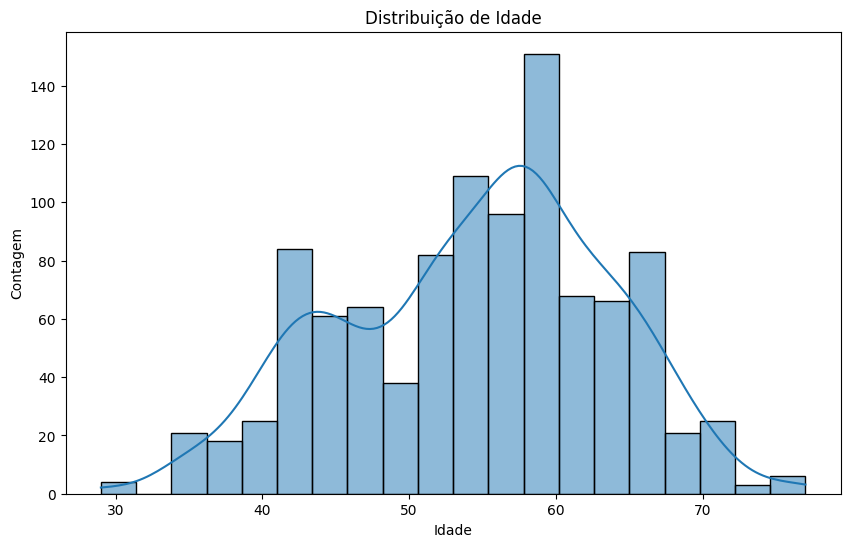

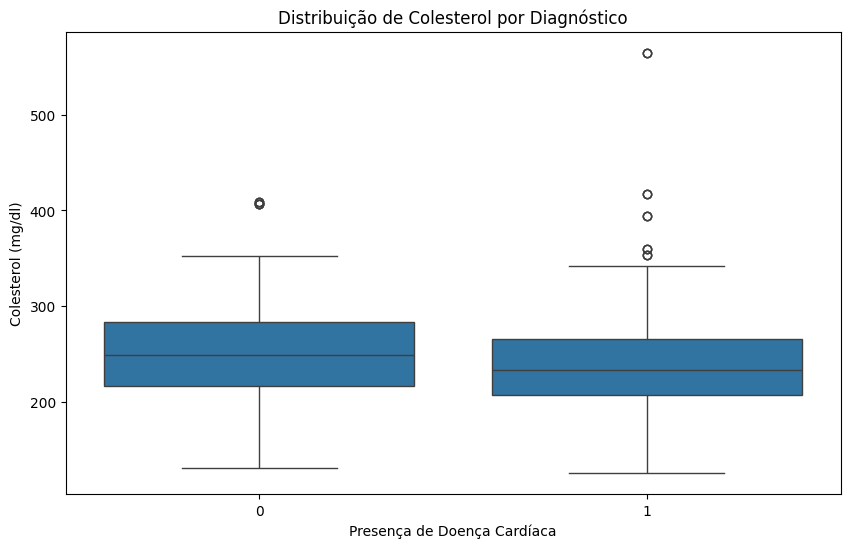

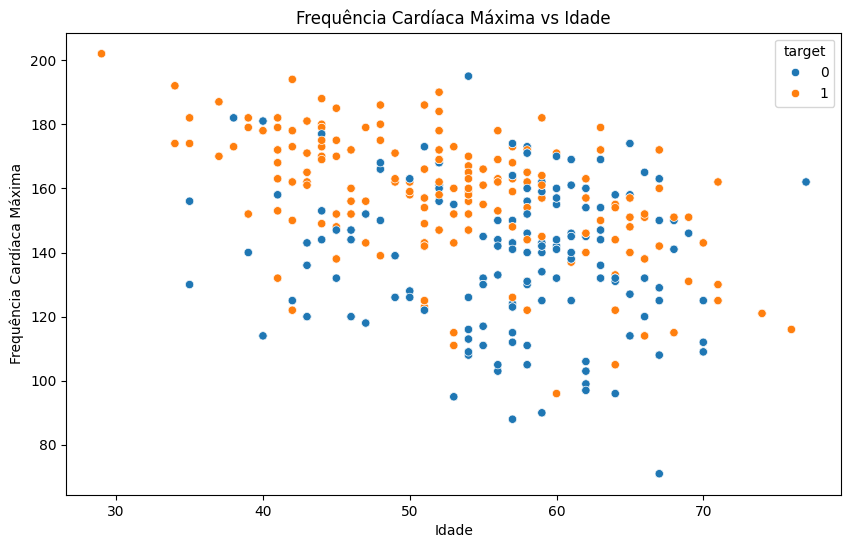

In [4]:
# Histograma para idade
plt.figure(figsize=(10,6))
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

# Boxplot para colesterol
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='target', y='chol')
plt.title('Distribuição de Colesterol por Diagnóstico')
plt.xlabel('Presença de Doença Cardíaca')
plt.ylabel('Colesterol (mg/dl)')
plt.show()

# Gráfico de dispersão entre frequência cardíaca máxima e idade
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age', y='thalach', hue='target')
plt.title('Frequência Cardíaca Máxima vs Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência Cardíaca Máxima')
plt.show()

Passo 4: Teste de Correlação

Agora, realizamos testes de correlação entre variáveis contínuas, como idade, colesterol e frequência cardíaca máxima.

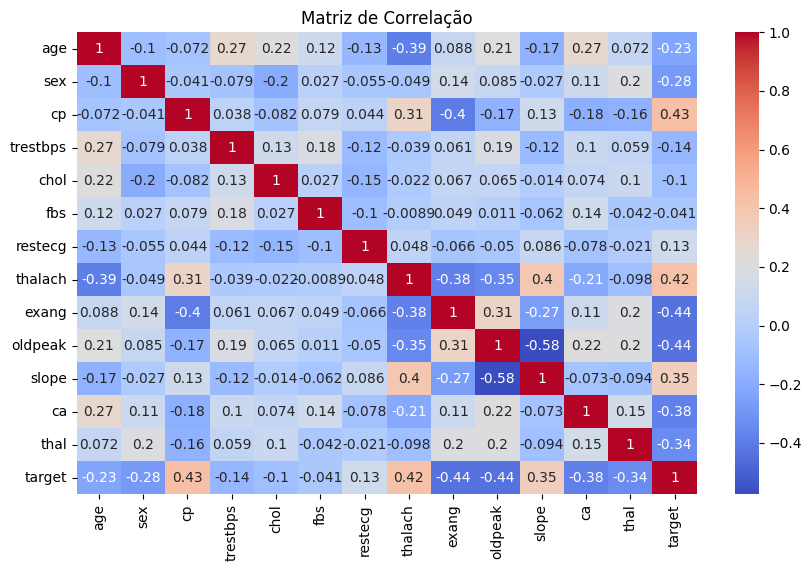

In [5]:
# Matriz de correlação
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

Passo 5: Modelo Explicativo (Regressão Logística)

Vamos construir um modelo de Regressão Logística para prever a presença de doença cardíaca.

In [7]:
# Separar variáveis independentes e dependente
X = df[['age', 'sex', 'cp', 'chol', 'thalach', 'ca']]
y = df['target']

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construir o modelo de regressão logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.70      0.75       159
           1       0.72      0.83      0.77       149

    accuracy                           0.76       308
   macro avg       0.77      0.77      0.76       308
weighted avg       0.77      0.76      0.76       308

[[111  48]
 [ 25 124]]


Passo 6: Interpretação dos Resultados

Agora, interpretamos os coeficientes da regressão logística e calculamos o AIC (Critério de Informação de Akaike) para verificar a qualidade do modelo.

In [8]:
# Exibir os coeficientes do modelo
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print(coefficients)

# Função para calcular AIC (AIC = 2k - 2ln(L), onde k é o número de parâmetros e L é a verossimilhança)
def calculate_aic(model, X, y):
    n = len(y)
    y_pred_proba = model.predict_proba(X)[:, 1]
    likelihood = np.sum(y*np.log(y_pred_proba) + (1 - y)*np.log(1 - y_pred_proba))
    k = X.shape[1]
    aic = 2*k - 2*likelihood
    return aic

# Calcular o AIC
aic_value = calculate_aic(model, X_test, y_test)
print(f"AIC do modelo: {aic_value}")

   Feature  Coefficient
0      age    -0.120818
1      sex    -0.886728
2       cp     0.852724
3     chol    -0.539223
4  thalach     0.932669
5       ca    -0.768833
AIC do modelo: 291.16075596704917


Passo 7: Conclusão

Baseado na análise e nos resultados do modelo, você pode concluir quais fatores de risco são mais relevantes para a previsão de doença cardíaca e discutir como esses fatores podem ser usados na prática clínica ou em pesquisas futuras.

##  Discussão

- **Interpretação dos Coeficientes:** A partir dos coeficientes, podemos observar quais variáveis têm maior impacto na presença de doença cardíaca. Por exemplo, um coeficiente positivo indica que o aumento dessa variável aumenta a probabilidade de presença da doença.

- **AIC:** O valor do AIC pode ser comparado com outros modelos para escolher o melhor entre várias alternativas.